<a href="https://colab.research.google.com/github/jumping2000/Quants/blob/main/portfolio_analysis/lsi_dca.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Lump Sum Investment (PIC) vs Dollar cost Averaging (PAC)

Il Notebook esegue una simulazione del rendimento della strategia PIC vs PAC (a rate costanti). E' possibile inserire anche più asset in modo da simulare un portafoglio.


*  https://github.com/bergio13/Lump-Sum-vs-DCA/blob/main/Lump%20Sum%20vs%20DCA%20(1).ipynb
*  https://python.plainenglish.io/lump-sum-vs-dollar-cost-averaging-in-python-257f791b35f1
*  https://github.com/Chukwuebuka-2003/DCA-or-Lump-Sum-Strategy/blob/main/blackOctavio.ipynb
*  https://elucidation.github.io/lumpsum_vs_dca/

<p>
<a href="https://colab.research.google.com/github/jumping2000/Quants/blob/master/portfolio_anlysis/lsi_dca.ipynb"> <img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open in Google Colaboratory"></a><p><a href="https://github.com/jumping2000/Quants/blob/main/portfolio_anlysis/lsi_dca.ipynb"> <img align="left" src="https://img.shields.io/badge/Github-Download-blue.svg" alt="Download" title="Download Notebook"></a>
</p>


In [2]:
import yfinance as yf
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
plt.style.use('ggplot')


## Inserimento dati iniziale

In [3]:
#############################################################################
# il capitale da investire, la rata e la frequenza della rata
start_date = '2006-01-01'
end_date = '2024-09-30'
initial_investment = 30000
rata = 1000
frequenza_rate = '1ME' # 1 mese
costo_commissione = 5 # in valuta
pesi_percentuali = np.array([0.8, 0.2])
#############################################################################

## Scarico dati da Yahoo Finance

In [4]:
# Scaricare i dati di Apple e Microsoft a partire dal 1 gennaio 2000
#stocks=[["Apple","AAPL"], ["Microsoft","MSFT"]]
#stocks = [["Ishares MSCI World","SWDA.MI"],["Invesco Phisycal Gold","SGLD.MI"]]
stocks = [["SPDR S&P 500 ETF Trust","SPY"],["iShares 7-10 Year Treasury Bond","IEF"]]
# DATI INIZIALI
nomi=list(np.array(stocks)[:,0])
tickers=list(np.array(stocks)[:,1])
numero_rate = int(initial_investment/rata)
print(f"\nNumero di rate: {numero_rate}")
print(f"Peso %: {pesi_percentuali}\n")

# SCARICO DA YAHOO
if len(tickers) == 1:
    tick = tickers[0]
    data = yf.download(tick, start=start_date, end=end_date)['Close']
    pesi_percentuali = 1
else:
    data = yf.download(tickers, start=start_date, end=end_date)['Close']
    data = data.reindex(tickers, axis=1)
# Rimuovere le righe con valori mancanti
data.dropna(inplace=True)
data


Numero di rate: 30
Peso %: [0.8 0.2]



[*********************100%***********************]  2 of 2 completed


Ticker,SPY,IEF
Date,,
2006-01-03 00:00:00+00:00,88.788231,52.308701
2006-01-04 00:00:00+00:00,89.208649,52.402229
2006-01-05 00:00:00+00:00,89.264702,52.414673
2006-01-06 00:00:00+00:00,90.007568,52.346100
2006-01-09 00:00:00+00:00,90.238777,52.371063
...,...,...
2024-09-23 00:00:00+00:00,569.669983,98.073303
2024-09-24 00:00:00+00:00,571.299988,98.182983
2024-09-25 00:00:00+00:00,570.039978,97.784149


In [5]:
def get_column_headers(df):
    """
    Questa funzione restituisce le intestazioni delle colonne di un DataFrame.
    """
    column_headers = df.columns.tolist()
    if len(column_headers) == 1:
        return column_headers[0]
    else:
        return column_headers

def get_norm(df):
    return df / df.iloc[0] * 100

# Scenario LSI - Investimento iniziale

In [6]:
# Calcolare l'investimento iniziale per ciascun titolo in base ai pesi
allocated_amounts = initial_investment * pesi_percentuali
# Get the latest price of the asset
latest_value = data.iloc[-1]
# Get number of shares bought on each date with the initial investment
n_shares_bought = (allocated_amounts / data) #initial_investment* / data
#######################################
n_shares_bought = n_shares_bought.astype(int)
#######################################
# Calculate how much money you earned
lumpsum = latest_value * n_shares_bought
if len(tickers) > 1:
    lumpsum['Total'] = lumpsum.sum(axis=1)
else:
    lumpsum = lumpsum.to_frame()
    lumpsum.columns = ['Total']
    #data = data.to_frame()
    #data.columns = tickers
lumpsum

Ticker,SPY,IEF,Total
Date,,,
2006-01-03 00:00:00+00:00,154296.892090,11183.765991,165480.658081
2006-01-04 00:00:00+00:00,153725.422119,11183.765991,164909.188110
2006-01-05 00:00:00+00:00,153153.952148,11183.765991,164337.718140
2006-01-06 00:00:00+00:00,152011.012207,11183.765991,163194.778198
2006-01-09 00:00:00+00:00,151439.542236,11183.765991,162623.308228
...,...,...,...
2024-09-23 00:00:00+00:00,24001.738770,5984.295837,29986.034607
2024-09-24 00:00:00+00:00,24001.738770,5984.295837,29986.034607
2024-09-25 00:00:00+00:00,24001.738770,5984.295837,29986.034607


In [7]:
print("##############################################################################")
print("Lump sum: Investing on the Best day, Worst day in past")
print(f"MAX - Investing ${initial_investment} on { lumpsum['Total'].idxmax().strftime('%b %d, %Y') } would be worth $ {lumpsum['Total'].max():,.0f} today")
print(f"MIN - Investing ${initial_investment} on { lumpsum['Total'].idxmin().strftime('%b %d, %Y') } would be worth $ {lumpsum['Total'].min():,.0f} today")
#print("2 - Investing $10,000 on {} would be worth ${:,.0f} today.".format(lumpsum['Total'].idxmin().strftime('%b %d, %Y'), lumpsum['Total'].min()))
#print("2 - Investing $10,000 on {} would be worth ${:,.0f} today.".format(lumpsum['Total'][:-1000].idxmin().strftime('%b %d, %Y'), lumpsum['Total'][:-1000].min()))

##############################################################################
Lump sum: Investing on the Best day, Worst day in past
MAX - Investing $30000 on Mar 09, 2009 would be worth $ 279,036 today
MIN - Investing $30000 on Sep 26, 2024 would be worth $ 29,415 today


## Scenario Dollar Cost Averaging (PAC)

In [8]:

def doDCA(investment, start_date, periods, frequency, tickers):
    '''
    ESEMPIO Investo $ 30.000 in 5 anni ($6.000/anno) con entrate ogni 3 mesi ($1500 ogni 3 mesi)
    investment = 30000
    periodo = 4 * 5 = 20
    portion = investment/periodo = 30000/20 = 1500
    '''
    # How much to invest on each date
    investment_portion = investment/periods
    # Get X investment dates in Y day increments starting from start date
    investment_dates_all = pd.date_range(start_date,periods=periods,freq=frequency)
    # Remove those dates beyond our known data range
    investment_dates = investment_dates_all[investment_dates_all < data.index[-1]]
    # Get closest business dates with available data
    closest_investment_dates = data.index.searchsorted(investment_dates)
    closest_investment_dates = data.index[closest_investment_dates]

    stock_number = investment_portion * pesi_percentuali / data.loc[closest_investment_dates]
    #######################################
    stock_number = stock_number.astype(int)
    #######################################

    # print("\nclosest_investment_dates: ",closest_investment_dates)
    #print("\nstock_number: ", stock_number)
    #print(stock_number.sum())

    # Get the cash that was not invested fromm the initial investment amount
    uninvested_cash = investment_portion * sum(investment_dates_all >= data.index[-1])

    result = {}
    if len(tickers) > 1:
        # Iteriamo in stock_numbers per popolare il dizionario
        for colonna in stock_number.columns:
            result[colonna] = data[colonna].iloc[-1] * stock_number[colonna].sum()
        # Itera attraverso le chiavi del dizionario e somma i valori della lista
        for i, chiave in enumerate(result):
            result[chiave] += uninvested_cash * pesi_percentuali[i]
        result['Total'] = sum(result.values())
    else:
        colonna = stock_number.columns[0]  # L'unica colonna disponibile
        result[colonna] = data[colonna].iloc[-1] * stock_number[colonna].sum()
        result[colonna] += uninvested_cash  # Tutto il cash va al singolo titolo
        result['Total'] = result[colonna]
    return result

#doDCA(initial_investment, '2024-06-01', 12, tickers)


In [9]:
DCA_List = []
for date in data.index:
   DCA_List.append(doDCA(initial_investment, date, numero_rate, frequenza_rate, tickers))

In [10]:
#DCA_List2 = []
#for date in data.index:
#   DCA_List2.append(doDCA(initial_investment, date, numero_rate / 4, '4ME', tickers))

In [11]:
#total_value = doDCA(initial_investment, start_date, tickers)
#print(f"\nValore totale del portafoglio partendo da {start_date}: ${total_value}")
##
#dca2 = pd.DataFrame(DCA_List2)
#dca2 = dca2.set_index(pd.DatetimeIndex(data.index)) #.squeeze()
dca = pd.DataFrame(DCA_List)
dca = dca.set_index(pd.DatetimeIndex(data.index)) #.squeeze()


## Confronto LSI vs DCA (Pic vs Pac)

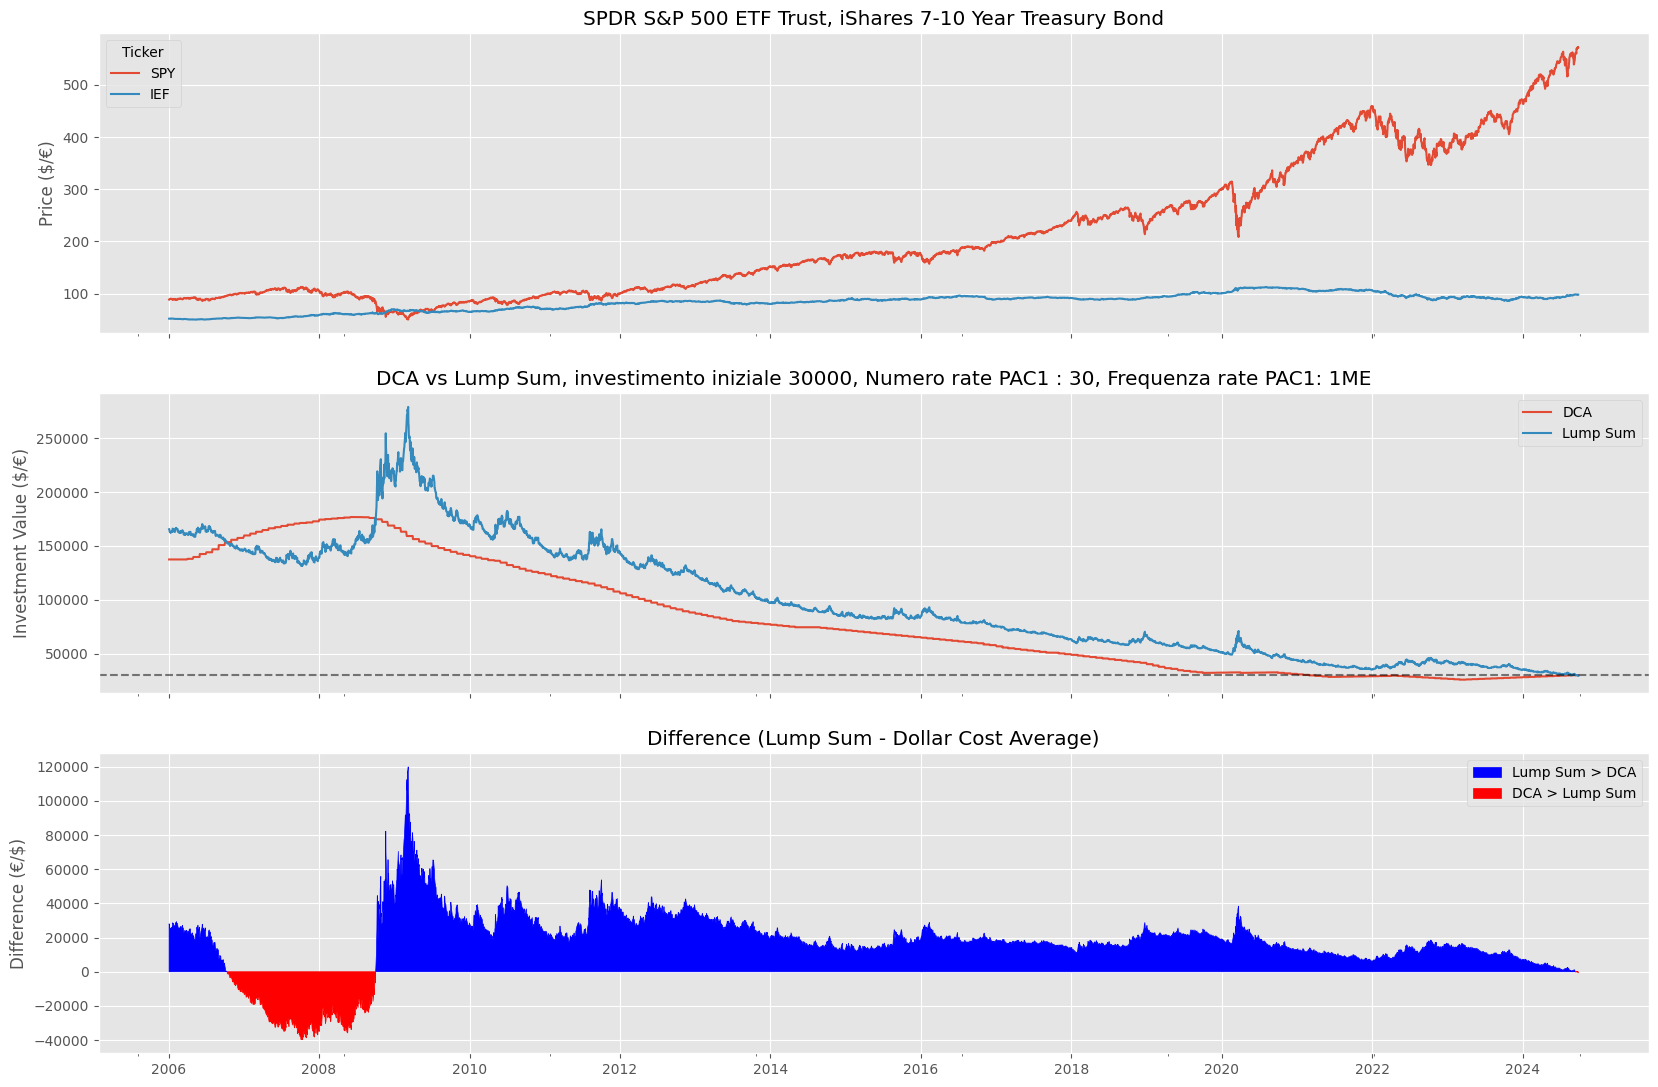

In [12]:
# Difference between LSI and DCA
difference = (lumpsum - dca)
difference.name = 'Difference (LSI - DCA)'

fig, (ax1, ax2, ax3) = plt.subplots(3,1, sharex=True, figsize=(20,15))

# Asset Actual
data.plot(ax=ax1)
ax1.set_xlabel('')
ax1.set_title(f", ".join([f"{item}" for item in nomi])) #(f'Historical Stock Price')
ax1.set_ylabel('Price ($/€)')

# Comparison
dca['Total'].plot(ax=ax2)
lumpsum['Total'].plot(ax=ax2)
ax2.axhline(initial_investment, alpha=0.5, linestyle="--", color="black")
ax2.legend(["DCA", "LSI"]);
ax2.set_title(f"DCA vs LSI, investimento iniziale {initial_investment}, Numero rate PAC1 : {numero_rate}, Frequenza rate PAC1: {frequenza_rate}")
ax2.set_ylabel('Investment Value ($/€)')

# Difference
ax3.fill_between(difference.index, y1=difference['Total'], y2=0, color='blue', where=difference['Total']>0)
ax3.fill_between(difference.index, y1=difference['Total'], y2=0, color='red', where=difference['Total']<0)

ax3.set_ylabel('Difference (€/$)')
ax3.set_title('Difference (Lump Sum Investment - Dollar Cost Average)')
ax3.legend(["LSA > DCA", "DCA > LSI"]);

## Ritorni DCA vs LSI

In [13]:
print("Lump sum investment")
print(f"MAX - Investendo {initial_investment} il { lumpsum['Total'].idxmax().strftime('%b %d, %Y') } avrebbe reso {lumpsum['Total'].max():,.0f} oggi")
print(f"MIN - Investendo {initial_investment} il { lumpsum['Total'].idxmin().strftime('%b %d, %Y') } avrebbe reso {lumpsum['Total'].min():,.0f} oggi")

print("\nDollar Cost Averaging")
print(f"MAX - Investendo {initial_investment} il { dca['Total'].idxmax().strftime('%b %d, %Y') } avrebbe reso {dca['Total'].max():,.0f} oggi")
print(f"MIN - Investendo {initial_investment} il { dca['Total'].idxmin().strftime('%b %d, %Y') } avrebbe reso {dca['Total'].min():,.0f} oggi")

Lump sum investment
MAX - Investendo 30000 il Mar 09, 2009 avrebbe reso 279,036 oggi
MIN - Investendo 30000 il Sep 26, 2024 avrebbe reso 29,415 oggi

Dollar Cost Averaging
MAX - Investendo 30000 il Jun 02, 2008 avrebbe reso 176,790 oggi
MIN - Investendo 30000 il Mar 01, 2023 avrebbe reso 25,818 oggi


## Calcolo % di vincita della strategia LSI su DCA

In [14]:
ls_win_perc = round(sum(difference['Total'] > 0) / len(difference) * 100, 1)
dca_win_perc = round(sum(difference['Total'] < 0) / len(difference) * 100, 1)

print(f'LSI ha reso più di DCA nel {str(ls_win_perc)} % del tempo')
print(f'LSI ha reso più di DCA nel {str(dca_win_perc)} % del tempo')

LSI ha reso più di DCA nel 89.2 % del tempo
LSI ha reso più di DCA nel 10.8 % del tempo


## Calcolo Volatilità

In [15]:
# volatilità giornaliera
ls_vol = lumpsum.pct_change().std()
dca_vol = dca.pct_change().std()

print('LSI Volatility:', round(ls_vol, 4),'\n')
print('DCA Volatility:', round(dca_vol, 4))

LSI Volatility: Ticker
SPY      0.0129
IEF      0.0068
Total    0.0118
dtype: float64 

DCA Volatility: SPY      0.0029
IEF      0.0029
Total    0.0027
dtype: float64


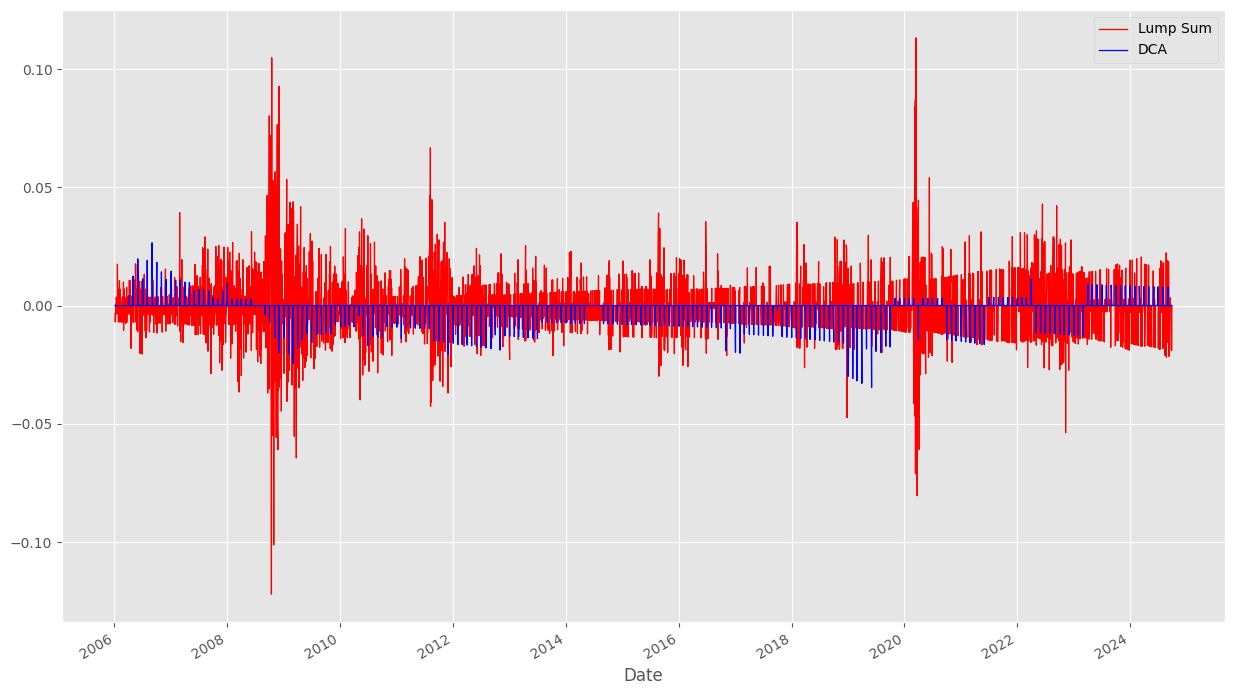

In [16]:
lumpsum['Total'].pct_change().plot(figsize=(15, 9), color='red', lw=0.9, label= 'Lump Sum')
dca['Total'].pct_change().plot(figsize=(15, 9), color='blue', lw=0.9, label= 'DCA')
plt.legend();

In [17]:
#titolo = ", ".join([f"{item}" for item in nomi])
#fig = px.line(
#    data_frame = data,
#    template="plotly_dark"
#)
#fig.update_layout(
#    title = titolo,
#    xaxis_title="Date",
#    yaxis_title="Value",
#    legend_title='Asset',
#    hovermode="x unified",
#)
#fig.show()

In [18]:
#dao_compare = pd.DataFrame({
#    'Lump Sum': lumpsum.Total,
#    'DCA1': dca.Total,
#    'DCA 2': dca2.Total
#})
#fig = px.line(
    #data_frame=lumpsum,
    # x=dca.index,
    # y=[lumpsum.Total, dca.Total, dca2.Total],
#    data_frame=dao_compare,
#    #markers=True
#    color_discrete_sequence=["#636EFA", "#EF553B", "#19D3F3", "#B6E880", "#FECB52", "#2ECB32","#FF6600","#0033CC"],
#    template="plotly_dark"
#)
#fig.update_layout(
#    title=f"DCA vs Lump Sum, investimento iniziale {initial_investment}, Numero rate PAC1 : {numero_rate}, Frequenza rate PAC1: {frequenza_rate}", # - Numero rate 2 : {numero_rate/4}, frequenza rate 2: 2M",
#    xaxis_title="Date",
#    yaxis_title="Value",
#    legend_title='Distribuzione',
#    hovermode="x unified"
#    #text = ["Date", "Value"]
#)
#fig.show()

In [19]:
#fig = px.area(
#    data_frame=difference,
#    #markers=True,
#    color_discrete_sequence=["#636EFA", "#EF553B", "#19D3F3", "#B6E880", "#FECB52", "#2ECB32","#FF6600","#0033CC"],
#    template="plotly_dark",
#)
#fig.update_layout(
#    title=f"DCA vs Lump Sum, investimento iniziale {initial_investment}, numero rate: {numero_rate}, frequenza rate: {frequenza_rate}",
#    xaxis_title="Date",
#    yaxis_title="Value",
#    legend_title='Asset',
#    hovermode="x unified"
#    #text = ["Date", "Value"]
#)
#fig.show()